In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
# mpl.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 

matplotlib.rcParams['lines.linewidth'] = 1
matplotlib.rcParams['lines.markersize'] = 5

In [3]:
import numpy as np
import scipy

In [4]:
from sympy import *

In [5]:
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z = symbols('a b c d e f g h i j k l m n o p q r s t u v w x y z')

In [6]:
variables = [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z]

In [7]:
functions = [(1, 'a'), (1, 'a**2'), (1, '1/(a**2+1)'), (1, 'sin(a)'), (1, 'E**a'), (1, 'log(a**2+1)')]

In [8]:
X_var = 0.5
y_var = 0.01

In [9]:
num_features = 1
num_noises = 10
num_data = 10000

In [10]:
n_rows = len(functions)
names = ['function', 'derivative', 'integration']
n_cols = len(names)

In [11]:
plt.rcParams['figure.figsize'] = [5*n_cols, 5*n_rows]
figure = plt.figure(figsize=(5*n_cols, 5*n_rows))
i = 1

<Figure size 1080x2160 with 0 Axes>

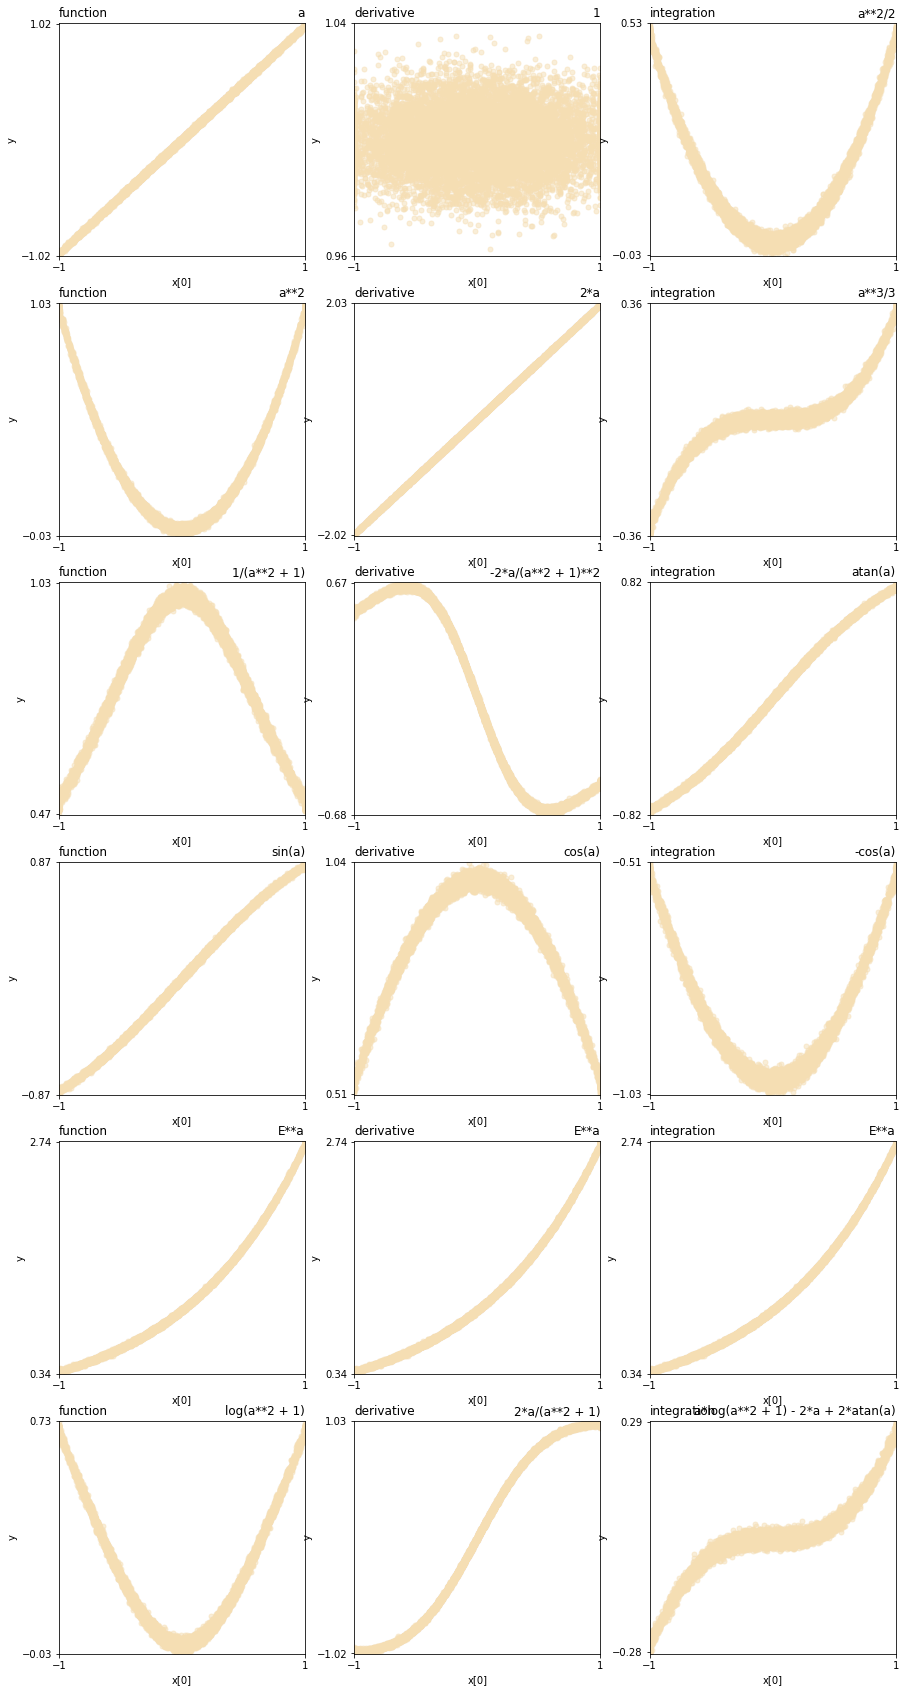

In [12]:
for index, (num_variables, function) in enumerate(functions):
    if i==0:
        figure.suptitle("Pseudo data of single variable (function, derivative, integration)", fontsize=16)
    
    expression = sympify(function, evaluate=False)
    derivative = diff(expression, variables[0])
    integration = integrate(expression, variables[0])
    exp_func = lambdify(variables[:num_variables], expression, "numpy")
    der_func = lambdify(variables[:num_variables], derivative, "numpy")
    int_func = lambdify(variables[:num_variables], integration, "numpy")
    funcs = [exp_func, der_func, int_func]
    
    X = np.clip(np.random.randn(num_data, num_features+num_noises)*X_var, -1, 1)
    X_features = [X[:, i] for i in range(num_features)]
    y_noise = np.random.randn(num_data)*y_var
    
    for name, func in zip(names, funcs):
        ax = plt.subplot(n_rows, n_cols, i)
        
        y_true = func(*X_features)
        y_value = y_true+y_noise
        
        ax.scatter(X_features[0], y_value, c='wheat', alpha=0.5)
        ax.set_xlabel(f'x[0]')
        ax.set_ylabel('y')
        
        ax.set_xlim(-1, 1)
        ax.set_ylim(y_value.min(), y_value.max())
        ax.set_xticks((-1, 1))
        ax.set_yticks((float(f'{y_value.min():.2f}'), float(f'{y_value.max():.2f}')))
        ax.set_title(name, loc='left')
        if i%n_cols == 1:
            ax.set_title(expression, loc='right')
        elif i%n_cols == 2:
            ax.set_title(derivative, loc='right')
        elif i%n_cols == 0:
            ax.set_title(integration, loc='right')
            
        i+=1
    
plt.show()